In [1]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
import healpy as hp
from mpl_toolkits.basemap import Basemap
from astropy.table import Table, Column, MaskedColumn

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt


In [3]:
def semi_a(theta,dist):
    """
    input theta in arcseconds, input distance in pc, output "a" (semimajor axis) is AU
    """
    ans = theta*dist
    return ans

In [4]:
AU_sec = 1.496e11/c

In [5]:
def kep_P(a,Mtot):
    """
    answer in days. 
    input "a" in AU and Mtot in solar masses.
    """
    frac = 4*pi*pi*(a*AU_sec)**3/(Mtot*s_mass)
    ans = sqrt(frac)
    return ans/60/60/24

def kep_a(P,Mtot):
    """
    answer in AU. 
    input "P" in days and Mtot in solar masses.
    """
    frac = (P*24*60*60)**2*(Mtot*s_mass)/(4*pi*pi)
    ans = frac**(1/3)
    return ans/AU_sec

In [6]:
kep_a(365.25,1) # Earth, sanity check

1.0000576845303153

In [7]:
kep_P(1,1)

365.21839836662093

In [ ]:
# ipta_3arcsec_wpm-result.csv

In [8]:
from astropy.io import ascii

In [17]:
data = ascii.read("ipta_3arcsec_wpm-result.csv")

In [76]:
# plotting RA, DEC and errors
ra_col = np.array(data[5][:])
ra_err = np.array(data[6][:])
dec_col = np.array(data[7][:])
dec_err = np.array(data[8][:])

In [77]:
# plotting RA, DEC and errors
ra_col =  ra_col[1:].astype("float64")
ra_err = ra_err[1:].astype("float64")
dec_col = dec_col[1:].astype("float64")
dec_err = dec_err[1:].astype("float64")

<Container object of 3 artists>

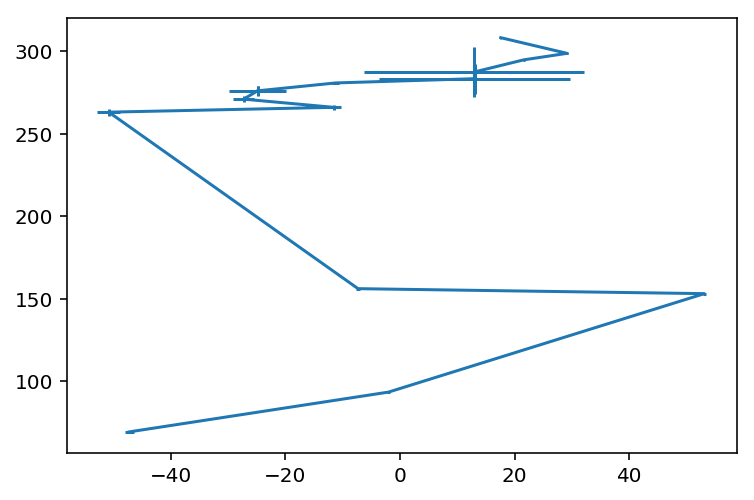

In [80]:
plt.figure()
plt.errorbar(dec_col, ra_col, xerr=dec_err, yerr=ra_err)

In [81]:
ra_col

array([  69.31660276,   93.43331574,  153.1393303 ,  156.1610927 ,
        263.200006  ,  266.1224646 ,  271.0877923 ,  271.0885103 ,
        276.1331586 ,  276.1335113 ,  276.1330099 ,  280.9223272 ,
        283.4892615 ,  287.5405352 ,  287.5398112 ,  287.5407215 ,
        294.910978  ,  298.8661015 ,  308.3650317 ])

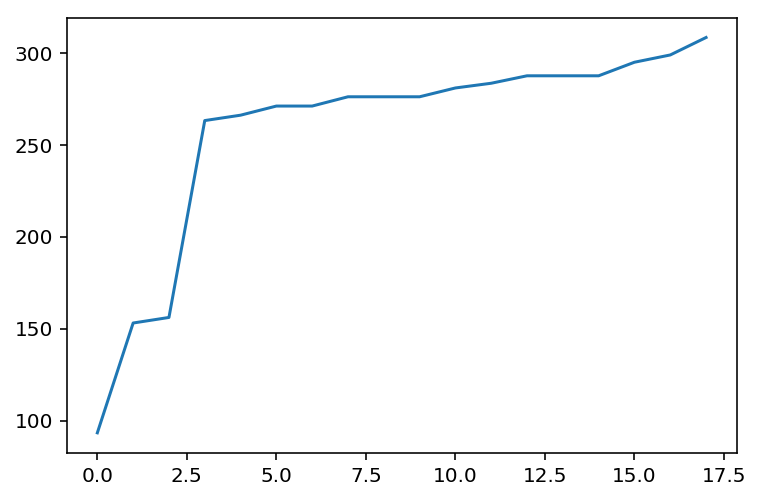

In [75]:
ra_err

In [70]:
ra_col = np.array(data[5][:])



In [72]:
ra_col = ra_col[1:]

In [74]:
ra_col.astype("float64")

array([  69.31660276,   93.43331574,  153.1393303 ,  156.1610927 ,
        263.200006  ,  266.1224646 ,  271.0877923 ,  271.0885103 ,
        276.1331586 ,  276.1335113 ,  276.1330099 ,  280.9223272 ,
        283.4892615 ,  287.5405352 ,  287.5398112 ,  287.5407215 ,
        294.910978  ,  298.8661015 ,  308.3650317 ])

In [69]:
 data[5][:]

ra
69.31660276
93.43331574
153.1393303
156.1610927
263.200006
266.1224646
271.0877923
271.0885103
276.1331586
276.1335113


In [61]:
t2 = test.astype("float64")

ValueError: could not convert string to float: ra

In [19]:
ra_lst

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,col63,col64,col65,col66,col67,col68,col69,col70,col71,col72,col73,col74,col75,col76,col77,col78,col79,col80,col81,col82,col83,col84,col85,col86,col87,col88,col89,col90,col91,col92,col93,col94,col95,col96,col97,col98,col99,col100,col101,col102,col103,col104,col105,col106,col107,col108,col109,col110,col111,col112,col113,col114,col115
str11,str28,str11,str12,str9,str11,str11,str12,str11,str12,str14,str19,str12,str11,str12,str11,str12,str16,str12,str13,str17,str13,str14,str18,str19,str15,str20,str20,str25,str24,str18,str19,str24,str28,str25,str24,str21,str25,str31,str20,str32,str23,str23,str25,str20,str17,str12,str16,str22,str27,str15,str13,str17,str23,str28,str16,str13,str17,str23,str28,str16,str24,str14,str10,str12,str10,str15,str21,str14,str16,str16,str16,str18,str11,str12,str11,str12,str11,str9,str21,str21,str7,str20,str20,str15,str28,str28,str11,str10,str23,str23,str7,str20,str20,str77,str20,str12,str11,str11,str12,str12,str12,str5,str6,str8,str11,str8,str11,str11,str11,str11,str11,str13,str14,str15
solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,ipta_wpm_oid,names,ra,dec,pmra,pmdec,dm,pepoch,posepoch,dmepoch,angdist,r_est,r_lo,r_hi,r_len,result_flag,modality_flag,angdist-arcsec,semimajor-axis
1.63572E+18,Gaia DR2 4789864076732331648,4.78986E+18,526469615,2015.5,69.31660276,0.582326756,-47.25267778,0.738504992,8.325044168,0.677716044,12.283971,122.8637296,1.197017697,-71.16597382,1.669768175,-0.10719865,0.30817017,-0.13529737,0.3569604,0.24767695,0.4017074,-0.29011166,0.1647735,0.040686335,-0.48158062,168,0,167,1,0.30433777,166.8592,0,0,31,FALSE,0.03673703,1.676063374,0.183407835,-0.045911558,20,16,1.6285695,0,21,FALSE,178,129.2994962,1.076756097,120.082436,20.409374,16,54.59060883,6.523782872,8.367938,21.008593,21,132.0143904,8.906934103,14.82153,19.460367,1.4431998,0,1.5482254,0.59921837,0.94900703,--,--,0,--,--,--,NOT_AVAILABLE,253.3946297,-41.96313675,50.46873937,-67.87315632,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,http://geadata.esac.esa.int/data-server/datalink/links?ID=478986407673233

# J1955+2908

In [ ]:
# GAIA theta = 0.153068
# dist = 1739.64867812642

In [27]:
semi_a(0.116353,3.532103245563161*1000) # size of semimajor axis in AU based on pulsar distance (DM) and theta from GAIA

410.9708089310105

In [17]:
kep_a(117,1.5)

0.5359437727573382

In [20]:
# parallax and error are 0.6034, 0.1942
d_est = 1/0.6034

In [21]:
sigma_d = (1/0.1942)/d_est**2 

In [24]:
sigma_d 

1.87482780638517

In [26]:
d_est + sigma_d

3.532103245563161

# J1012+5307

In [ ]:
semi_a(0.071544965,0.734400211678976)

In [ ]:
kep_a(0.6,1.5)

# J0437-4715

In [ ]:
semi_a(0.071544965,0.121088886192142)

In [ ]:
kep_a(5.7,1.5)

# J1744-1134

In [ ]:
semi_a(1.971,3.18833137078074) 

In [ ]:
kep_P(6,1.6) # days

In [ ]:
kep_P(6,1.6)/365 # years

In [ ]:
# Could be in a 4,000 day orbit.

# J1843-1113

In [ ]:
t2 = semi_a(1.485199,2.84349320264736)

In [ ]:
t2

In [ ]:
kep_P(t2,1.6) # days 

In [ ]:
kep_P(t2,1.6)/365 # years

In [ ]:
# Could be in a 2,500 day orbit. Need to follow up with GAIA data parallax measurements

# J1939+2134

In [ ]:
t1939 = semi_a(2.138534,4.77262010957524)

In [ ]:
kep_P(t1939,1.6) # days

In [ ]:
kep_P(t1939,1.6)/365 # years

# J1910+1256

In [ ]:
t1910 = semi_a(2.138534/7218, 4.77262010957524)

In [ ]:
kep_a(t1910,1.5)

In [ ]:
t1910

In [ ]:
# So if I need to divide 1910 by 7200, and 1955 by 412, what is correct for 1910??

In [ ]:
# Could be in ~1,000 - 30,000 year orbit or longer